In [ ]:
import pandas as pd

# Load Dataset
df = pd.read_csv('workout-final.csv')

# Display First Few Rows
print(df.head())

# Check for Missing Values
print(df.isnull().sum())

# Check Data Info
print(df.info())


   id  age  height  weight fitness_goals fitness_level   health_conditions  \
0   0   43     156      83      maintain      beginner              Asthma   
1   1   20     178      85      maintain      advanced              Cancer   
2   2   39     166      53  build muscle      beginner              Asthma   
3   3   56     160      99   lose weight      advanced      Chronic Stress   
4   4   48     154      97   lose weight      advanced  Metabolic Syndrome   

                                 recommended_workout  sets  repetitions  \
0  ['Plank', 'Arm Circles', 'Step-ups', 'Calf Rai...     2           11   
1  ['Plank', 'Arm Circles', 'Step-ups', 'Glute Br...     4           25   
2  ['Plank', 'Arm Circles', 'Step-ups', 'Calf Rai...     2           11   
3  ['Russian Twist', 'Bicycle Crunches', 'Glute B...     4           16   
4  ['Squats', 'Lunges', 'Step-ups', 'Plank', 'Rus...     4           24   

                                               image  
0  /images/plank.jpg, /im

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Fill Missing Values
df.fillna("None", inplace=True)

# Encode Categorical Variables
label_encoders = {}
categorical_columns = ['fitness_goals', 'fitness_level', 'health_conditions']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Save encoders for later use

# Convert Recommended Workouts to Lists
df['recommended_workout'] = df['recommended_workout'].apply(eval)

# Display Processed Data
print(df.head())


   id  age  height  weight  fitness_goals  fitness_level  health_conditions  \
0   0   43     156      83              2              1                  2   
1   1   20     178      85              2              0                  4   
2   2   39     166      53              0              1                  2   
3   3   56     160      99              1              0                  5   
4   4   48     154      97              1              0                 12   

                                 recommended_workout  sets  repetitions  \
0        [Plank, Arm Circles, Step-ups, Calf Raises]     2           11   
1       [Plank, Arm Circles, Step-ups, Glute Bridge]     4           25   
2        [Plank, Arm Circles, Step-ups, Calf Raises]     2           11   
3  [Russian Twist, Bicycle Crunches, Glute Bridge...     4           16   
4  [Squats, Lunges, Step-ups, Plank, Russian Twis...     4           24   

                                               image  
0  /images/plank.jp

In [ ]:
# Calculate BMI
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

# Display First Few Rows
print(df[['age', 'height', 'weight', 'bmi']].head())


   age  height  weight        bmi
0   43     156      83  34.105851
1   20     178      85  26.827421
2   39     166      53  19.233561
3   56     160      99  38.671875
4   48     154      97  40.900658


In [ ]:
# Define Features
X = df[['age', 'weight', 'height', 'fitness_goals', 'fitness_level', 'health_conditions', 'bmi']]

# Define Target (Recommended Workout)
y = df['recommended_workout']  # This column contains workout lists


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Apply MultiLabel Binarizer (MLB) to transform target column into binary format
mlb = MultiLabelBinarizer()
y_transformed = mlb.fit_transform(y)

# Convert it back to DataFrame for better readability
y_df = pd.DataFrame(y_transformed, columns=mlb.classes_)

# Display Transformed Target Data
print(y_df.head())


   Arm Circles  Bicycle Crunches  Calf Raises  Crunches  Glute Bridge  \
0            1                 0            1         0             0   
1            1                 0            0         0             1   
2            1                 0            1         0             0   
3            1                 1            0         0             1   
4            0                 0            0         1             0   

   Hammer Curl  Leg Raises  Lunges  Plank  Pushups  Russian Twist  Squats  \
0            0           0       0      1        0              0       0   
1            0           0       0      1        0              0       0   
2            0           0       0      1        0              0       0   
3            0           0       0      0        0              1       0   
4            0           0       1      1        0              1       1   

   Step-ups  Tricep Dips  
0         1            0  
1         1            0  
2         1      

In [ ]:
from sklearn.model_selection import train_test_split

# Split into Training & Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y_df, test_size=0.2, random_state=42)

# Display Shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (56000, 7) (56000, 14)
Testing Set Shape: (14000, 7) (14000, 14)


In [ ]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier

# Initialize XGBoost Classifier
xgb_base = xgb.XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.05, random_state=42)

# Multi-Output Model (Handles Multiple Labels)
xgb_model = MultiOutputClassifier(xgb_base)
xgb_model.fit(X_train, y_train)

print("✅ Model Training Complete!")


✅ Model Training Complete!


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on Test Set
y_pred = xgb_model.predict(X_test)

# Compute Accuracy for Each Label
accuracy_per_class = (y_pred == y_test).mean()

# Display Accuracy
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
print("Accuracy per Workout Class:\n", accuracy_per_class)


Overall Accuracy: 1.0
Accuracy per Workout Class:
 Arm Circles         1.0
Bicycle Crunches    1.0
Calf Raises         1.0
Crunches            1.0
Glute Bridge        1.0
Hammer Curl         1.0
Leg Raises          1.0
Lunges              1.0
Plank               1.0
Pushups             1.0
Russian Twist       1.0
Squats              1.0
Step-ups            1.0
Tricep Dips         1.0
dtype: float64


In [ ]:
# Check what 0, 1, 3 mean for fitness_goals, fitness_level, and health_conditions
print("Fitness Goals Mapping:", dict(enumerate(label_encoders['fitness_goals'].classes_)))
print("Fitness Level Mapping:", dict(enumerate(label_encoders['fitness_level'].classes_)))
print("Health Conditions Mapping:", dict(enumerate(label_encoders['health_conditions'].classes_)))

# Decode specific values
print("Fitness Goal (0) ->", label_encoders['fitness_goals'].inverse_transform([0])[0])
print("Fitness Level (1) ->", label_encoders['fitness_level'].inverse_transform([1])[0])
print("Health Condition (3) ->", label_encoders['health_conditions'].inverse_transform([3])[0])


Fitness Goals Mapping: {0: 'build muscle', 1: 'lose weight', 2: 'maintain'}
Fitness Level Mapping: {0: 'advanced', 1: 'beginner', 2: 'intermediate'}
Health Conditions Mapping: {0: 'Anemia', 1: 'Arthritis', 2: 'Asthma', 3: 'Back Pain', 4: 'Cancer', 5: 'Chronic Stress', 6: 'Depression and Anxiety', 7: 'Diabetes Type 1', 8: 'Diabetes Type 2', 9: 'Hypertension (High Blood Pressure)', 10: 'Hyperthyroidism', 11: 'Hypothyroidism', 12: 'Metabolic Syndrome', 13: 'None', 14: 'Obesity', 15: 'Osteoporosis'}
Fitness Goal (0) -> build muscle
Fitness Level (1) -> beginner
Health Condition (3) -> Back Pain


In [ ]:
import pandas as pd

# Function to Encode Categorical Inputs
def encode_input(fitness_goals, fitness_level, health_conditions):
    """
    Converts text inputs into numeric values using previously fitted encoders.
    """
    fitness_goals_encoded = label_encoders['fitness_goals'].transform([fitness_goals])[0]
    fitness_level_encoded = label_encoders['fitness_level'].transform([fitness_level])[0]
    health_conditions_encoded = label_encoders['health_conditions'].transform([health_conditions])[0]

    return fitness_goals_encoded, fitness_level_encoded, health_conditions_encoded

# Function to Recommend Workouts
def recommend_workout(age, weight, height, fitness_goals, fitness_level, health_conditions):
    """
    Takes user inputs in text format, encodes them, predicts workouts using XGBoost,
    and decodes the predicted labels into human-readable workout names.
    """
    # Encode the categorical inputs
    fitness_goals_encoded, fitness_level_encoded, health_conditions_encoded = encode_input(
        fitness_goals, fitness_level, health_conditions
    )

    # Prepare Input Data
    user_data = pd.DataFrame([[age, weight, height, fitness_goals_encoded, fitness_level_encoded,
                               health_conditions_encoded, weight / ((height / 100) ** 2)]],  # BMI
                              columns=X.columns)

    # Predict Probabilities
    pred_probs = xgb_model.predict(user_data)

    # Convert Back to Workout Names
    recommended_workouts = mlb.inverse_transform(pred_probs)

    return recommended_workouts[0]

# Example: Recommend Workouts for a User
user_workouts = recommend_workout(
    age=20, weight=85, height=158,
    fitness_goals="maintain",
    fitness_level="advanced",
    health_conditions="Cancer"
)

print("🏋 Recommended Workouts:", user_workouts)


🏋 Recommended Workouts: ('Arm Circles', 'Glute Bridge', 'Plank', 'Step-ups')


In [ ]:

# Add Image URLs for each workout
workout_image_urls = {
    "Plank": "https://www.shape.com/thmb/T2GyvzFah3XYR8_L8W16ANWBTXs=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/low-plank-hold-b8a63da1ef844f00b6f6a21141ba1d87.jpg",
    "Squats": "https://www.example.com/squats.jpg",
    "Pushups": "https://www.example.com/pushups.jpg",
    "Lunges": "https://www.example.com/lunges.jpg",
    "Glute Bridge": "https://www.example.com/glute_bridge.jpg",
    "Bicycle Crunches": "https://www.example.com/bicycle_crunches.jpg",
    "Russian Twist": "https://www.example.com/russian_twist.jpg",
    "Step-ups": "https://www.example.com/step_ups.jpg",
    "Tricep Dips": "https://www.example.com/tricep_dips.jpg"
}

# Function to Encode Categorical Inputs
def encode_input(fitness_goals, fitness_level, health_conditions):
    fitness_goals_encoded = label_encoders["fitness_goals"].transform([fitness_goals])[0]
    fitness_level_encoded = label_encoders["fitness_level"].transform([fitness_level])[0]
    health_conditions_encoded = label_encoders["health_conditions"].transform([health_conditions])[0]
    return fitness_goals_encoded, fitness_level_encoded, health_conditions_encoded

# Function to Recommend Workouts
def recommend_workout(age, weight, height, fitness_goals, fitness_level, health_conditions):
    fitness_goals_encoded, fitness_level_encoded, health_conditions_encoded = encode_input(
        fitness_goals, fitness_level, health_conditions
    )

    # Prepare Input Data
    user_data = pd.DataFrame([[age, weight, height, fitness_goals_encoded, fitness_level_encoded,
                               health_conditions_encoded, weight / ((height / 100) ** 2)]],  # BMI
                              columns=["age", "weight", "height", "fitness_goals", "fitness_level",
                                       "health_conditions", "bmi"])

    # Predict Probabilities
    pred_probs = xgb_model.predict(user_data)

    # Convert Back to Workout Names
    recommended_workouts = mlb.inverse_transform(pred_probs)[0]

    # Get Sets, Repetitions & Image URLs
    workout_details = df[df["recommended_workout"].apply(lambda x: any(w in recommended_workouts for w in x))]

    return workout_details

# Function to Display Recommendations
def display_recommendations(workout_details):
    for _, row in workout_details.iterrows():
        workout_name = row["recommended_workout"][0]  # First recommended workout
        print(f"🏋 Workout: {workout_name}")
        print(f"   📌 Sets: {row['sets']}")
        print(f"   🔄 Repetitions: {row['repetitions']}")

        # Display Workout Image from URL
        if workout_name in workout_image_urls:
            display(Image(url=workout_image_urls[workout_name], width=200))

        print("-" * 50)

# Example: Recommend Workouts for a User
user_workouts = recommend_workout(
    age=25, weight=70, height=175,
    fitness_goals="lose weight",
    fitness_level="beginner",
    health_conditions="Diabetes Type 2"
)

print("\n🔹 **Recommended Workouts:**")
display_recommendations(user_workouts)

In [ ]:
import joblib

# Save Model & Encoders
joblib.dump(xgb_model, 'xgb_workout_model.pkl')
joblib.dump(mlb, 'mlb_encoder.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("✅ Model & Encoders Saved!")


✅ Model & Encoders Saved!



🔹 **Recommended Workouts:**
🏋 Workout: Plank
   📌 Sets: 2
   🔄 Repetitions: 11


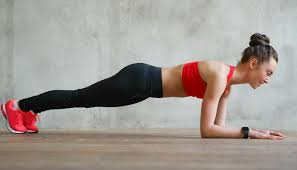

--------------------------------------------------
🏋 Workout: Step-ups
   📌 Sets: 2
   🔄 Repetitions: 11
⚠ Image not found
--------------------------------------------------
🏋 Workout: Squats
   📌 Sets: 4
   🔄 Repetitions: 24


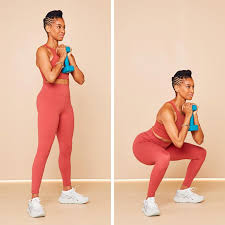

--------------------------------------------------
🏋 Workout: Lunges
   📌 Sets: 4
   🔄 Repetitions: 24


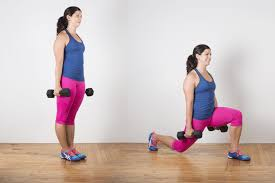

--------------------------------------------------
🏋 Workout: Pushups
   📌 Sets: 2
   🔄 Repetitions: 11


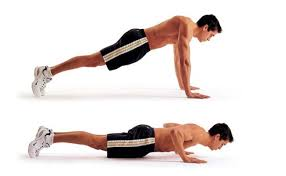

--------------------------------------------------
🏋 Workout: Hammer Curl
   📌 Sets: 2
   🔄 Repetitions: 15


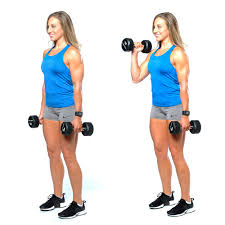

--------------------------------------------------


In [ ]:
import os
import pandas as pd
import joblib
from IPython.display import display
from PIL import Image

# 📂 Set Image Folder Path
IMAGE_FOLDER = "/content/drive/MyDrive/workout_images"  # Change this to your actual folder name

# Load Encoders and Model
label_encoders = joblib.load("label_encoders.pkl")  # Ensure encoders are saved
xgb_model = joblib.load("xgb_workout_model.pkl")  # Ensure trained model is saved
mlb = joblib.load("mlb_encoder.pkl")  # MultiLabelBinarizer for decoding workouts

# Load Dataset to Fetch Workout Details
df = pd.read_csv("workout-final.csv")

# Convert recommended_workout column from string to list
df["recommended_workout"] = df["recommended_workout"].apply(eval)

# Function to Encode Categorical Inputs
def encode_input(fitness_goals, fitness_level, health_conditions):
    fitness_goals_encoded = label_encoders["fitness_goals"].transform([fitness_goals])[0]
    fitness_level_encoded = label_encoders["fitness_level"].transform([fitness_level])[0]
    health_conditions_encoded = label_encoders["health_conditions"].transform([health_conditions])[0]
    return fitness_goals_encoded, fitness_level_encoded, health_conditions_encoded

# Function to Recommend Workouts
def recommend_workout(age, weight, height, fitness_goals, fitness_level, health_conditions):
    # Encode categorical inputs
    fitness_goals_encoded, fitness_level_encoded, health_conditions_encoded = encode_input(
        fitness_goals, fitness_level, health_conditions
    )

    # Prepare Input Data
    user_data = pd.DataFrame([[age, weight, height, fitness_goals_encoded, fitness_level_encoded,
                               health_conditions_encoded, weight / ((height / 100) ** 2)]],  # BMI
                              columns=["age", "weight", "height", "fitness_goals", "fitness_level",
                                       "health_conditions", "bmi"])

    # Predict Probabilities
    pred_probs = xgb_model.predict(user_data)

    # Convert Back to Workout Names
    recommended_workouts = mlb.inverse_transform(pred_probs)[0]

    # Filter dataset to get only these workouts **without duplication**
    workout_details = df.explode("recommended_workout")
    workout_details = workout_details[workout_details["recommended_workout"].isin(recommended_workouts)]

    # Drop duplicates to ensure **each workout appears only once**
    workout_details = workout_details.drop_duplicates(subset=["recommended_workout"])

    return workout_details

# Function to Display Recommendations
def display_recommendations(workout_details):
    for _, row in workout_details.iterrows():
        workout_name = row["recommended_workout"]
        print(f"🏋 Workout: {workout_name}")
        print(f"   📌 Sets: {row['sets']}")
        print(f"   🔄 Repetitions: {row['repetitions']}")

        # Load Image from Local Folder
        image_path = os.path.join(IMAGE_FOLDER, f"{workout_name.lower().replace(' ', '_')}.jpg")

        if os.path.exists(image_path):
            display(Image.open(image_path))
        else:
            print("⚠ Image not found")

        print("-" * 50)

# Example: Recommend Workouts for a User
user_workouts = recommend_workout(
    age=25, weight=70, height=175,
    fitness_goals="lose weight",
    fitness_level="beginner",
    health_conditions="Diabetes Type 2"
)

print("\n🔹 **Recommended Workouts:**")
display_recommendations(user_workouts)


🔹 **Recommended Workouts:**
🏋 Workout: Arm Circles
   📌 Sets: 2
   🔄 Repetitions: 11


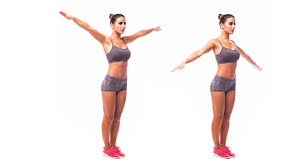

--------------------------------------------------
🏋 Workout: Glute Bridge
   📌 Sets: 4
   🔄 Repetitions: 25


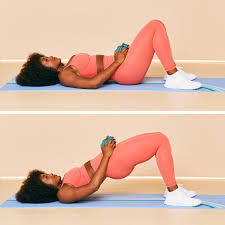

--------------------------------------------------
🏋 Workout: Russian Twist
   📌 Sets: 4
   🔄 Repetitions: 16


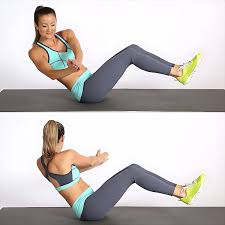

--------------------------------------------------
🏋 Workout: Bicycle Crunches
   📌 Sets: 4
   🔄 Repetitions: 16


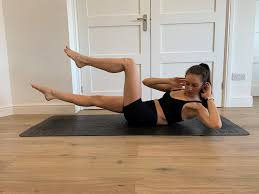

--------------------------------------------------


In [ ]:
import os
import pandas as pd
import joblib
from IPython.display import display
from PIL import Image

# 📂 Set Image Folder Path
IMAGE_FOLDER = "/content/drive/MyDrive/workout_images"  # Change this to your actual folder name

# Load Encoders and Model
label_encoders = joblib.load("label_encoders.pkl")  # Ensure encoders are saved
xgb_model = joblib.load("xgb_workout_model.pkl")  # Ensure trained model is saved
mlb = joblib.load("mlb_encoder.pkl")  # MultiLabelBinarizer for decoding workouts

# Load Dataset to Fetch Workout Details
df = pd.read_csv("workout-final.csv")

# Convert recommended_workout column from string to list
df["recommended_workout"] = df["recommended_workout"].apply(eval)

# Function to Encode Categorical Inputs
def encode_input(fitness_goals, fitness_level, health_conditions):
    fitness_goals_encoded = label_encoders["fitness_goals"].transform([fitness_goals])[0]
    fitness_level_encoded = label_encoders["fitness_level"].transform([fitness_level])[0]
    health_conditions_encoded = label_encoders["health_conditions"].transform([health_conditions])[0]
    return fitness_goals_encoded, fitness_level_encoded, health_conditions_encoded

# Function to Recommend Workouts
def recommend_workout(age, weight, height, fitness_goals, fitness_level, health_conditions):
    # Encode categorical inputs
    fitness_goals_encoded, fitness_level_encoded, health_conditions_encoded = encode_input(
        fitness_goals, fitness_level, health_conditions
    )

    # Prepare Input Data
    user_data = pd.DataFrame([[age, weight, height, fitness_goals_encoded, fitness_level_encoded,
                               health_conditions_encoded, weight / ((height / 100) ** 2)]],  # BMI
                              columns=["age", "weight", "height", "fitness_goals", "fitness_level",
                                       "health_conditions", "bmi"])

    # Predict Probabilities
    pred_probs = xgb_model.predict(user_data)

    # Convert Back to Workout Names
    recommended_workouts = mlb.inverse_transform(pred_probs)[0]

    # Filter dataset to get only these workouts **without duplication**
    workout_details = df.explode("recommended_workout")
    workout_details = workout_details[workout_details["recommended_workout"].isin(recommended_workouts)]

    # Drop duplicates to ensure **each workout appears only once**
    workout_details = workout_details.drop_duplicates(subset=["recommended_workout"])

    return workout_details

def find_image(workout_name):
    """
    Searches for an image file with different extensions and case variations.
    Returns the correct path if found, else None.
    """
    normalized_name = workout_name.lower().replace(" ", "_")
    possible_extensions = [".jpg", ".jpeg", ".png", ".JPG", ".JPEG", ".PNG"]

    for ext in possible_extensions:
        image_path = os.path.join(IMAGE_FOLDER, normalized_name + ext)
        if os.path.exists(image_path):
            return image_path
    return None

def display_recommendations(workout_details):
    for _, row in workout_details.iterrows():
        workout_name = row["recommended_workout"]
        print(f"🏋 Workout: {workout_name}")
        print(f"   📌 Sets: {row['sets']}")
        print(f"   🔄 Repetitions: {row['repetitions']}")

        # 🔍 Search for image with multiple extensions
        image_path = find_image(workout_name)

        if image_path:
            display(Image.open(image_path))
        else:
            print("⚠ Image not found")

        print("-" * 50)

# Example: Recommend Workouts for a User
user_workouts = recommend_workout(
    age=56, weight=99, height=160,
    fitness_goals="lose weight",
    fitness_level="advanced",
    health_conditions="Chronic Stress"
)

print("\n🔹 **Recommended Workouts:**")
display_recommendations(user_workouts)

🔍 Checking image path: /content/drive/MyDrive/workout_images/step_ups.jpg
✅ Image found for Step ups!


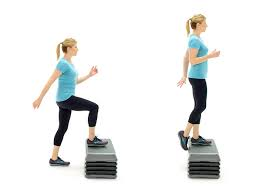

In [ ]:
import os
import IPython.display as display
from PIL import Image

# ✅ Update this with your actual image folder path
image_folder = "/content/drive/MyDrive/workout_images"

# ✅ Mapping workout names to image filenames (Ensure naming consistency)
workout_image_map = {
    "Arm Circles": "arm_circles.jpg",
    "Calf Raises": "calf_raises.jpg",
    "Crunches": "crunches.jpg",
    "Glute Bridge": "glute_bridge.jpg",
    "Hammer Curl": "hammer_curl.jpg",
    "Leg Raises": "leg_raises.jpg",
    "Lunges": "lunges.jpg",
    "Plank": "plank.jpg",
    "Pullups": "pullups.jpg",
    "Pushups": "pushups.jpg",
    "Russian Twist": "russian_twist.jpg",
    "Squats": "squats.jpg",
    "Tricep Dips": "tricep_dips.jpg",
    "Bicycle Crunches": "bicycle_crunches.jpg",
    "Step ups": "step_ups.jpg"  # ✅ Ensure the correct name is used
}

# ✅ Function to fetch the correct image path
def get_image_path(workout_name):
    filename = workout_image_map.get(workout_name, "default.jpg")  # Default fallback
    full_path = os.path.join(image_folder, filename)
    return full_path

# ✅ Check if the image exists before displaying
def display_workout_image(workout_name):
    image_path = get_image_path(workout_name)

    print("🔍 Checking image path:", image_path)  # Debugging output

    if os.path.exists(image_path):
        print(f"✅ Image found for {workout_name}!")
        img = Image.open(image_path)
        display.display(img)  # Show the image
    else:
        print(f"❌ Image not found for {workout_name}!")

# 🔥 Test the function with "Step ups"
display_workout_image("Step ups")
